In [3]:
import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
matplotlib.rc('text', usetex=True)
matplotlib.rcParams.update({"font.size":16})
import os
import sys

sys.path.append(os.path.abspath('../..'))
from modules import io

In [4]:
SIM     = "steady_real_out"
PATH    = "right_iliac"
CSV     = "/media/marsdenlab/Data1/UQ/0110/csv/"+SIM+'/'+PATH+".csv"

generation = 1 
mesh       = 'coarse'

FIG_DIR = os.path.join("/media/marsdenlab/Data1/UQ/0110/",SIM,
                       str(generation),mesh,PATH,"stats")


# quants  = ["area", "radius_actual", "pressure_00400_0", "velocity_00400_3", "vWSS_00400_3_boundary"]

# labels = [ "area", "radius", "pressure", "velocity", "vWSS"]

quant = "vWSS_3_boundary"
label = "vWSS"

BOOT_ROUNDS = 30

df = pd.read_csv(CSV)

data = df.loc[(df['mesh']==mesh) & (df['generation']==generation)]

models = list(data['model'].unique())
x      = list(data['point'].unique())

Nx = len(x)
Nm = len(models)

print(df.columns)
print(Nm,' models')
print(Nx,' points')

FileNotFoundError: File b'/media/marsdenlab/Data1/UQ/0110/csv/steady_real_out/right_iliac.csv' does not exist

In [3]:
d1 = FIG_DIR+'/'+str(generation)
io.rmdir(d1)
io.mkdir(d1)

d2 = d1+'/'+mesh    
io.mkdir(d2)

FileNotFoundError: [Errno 2] No such file or directory: '/media/marsdenlab/Data1/UQ/0110/stats/steady_real_out/right_iliac_tube/1'

In [21]:
Y  = np.zeros((Nm,Nx))
for i,mo in enumerate(models):
    y    = data.loc[data['model']==mo][quant].values
    Y[i] = y

In [22]:
MAT_STD = np.zeros((Nm-2,BOOT_ROUNDS))
inds    = np.arange(Nm)
BOOT_INDS = range(2,Nm)
for i in BOOT_INDS:
    for j in range(BOOT_ROUNDS):
        boot_inds = np.random.choice(inds, size=i)
        data = Y[boot_inds]
        sigs = np.std(data,axis=1)
        sig_bar = np.mean(sigs)
        
        MAT_STD[i-2,j] = sig_bar

In [23]:
mu_std = np.mean(MAT_STD,axis=1)
std_std = np.std(MAT_STD,axis=1)
rel_std = std_std/mu_std

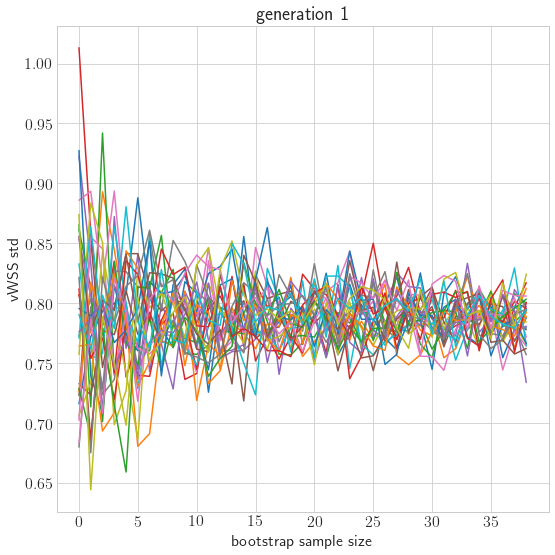

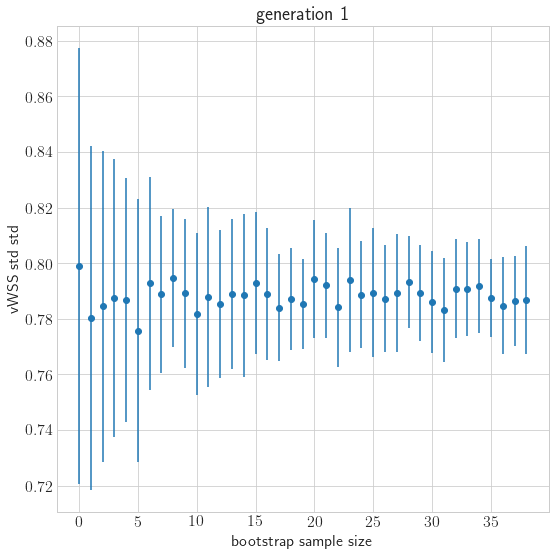

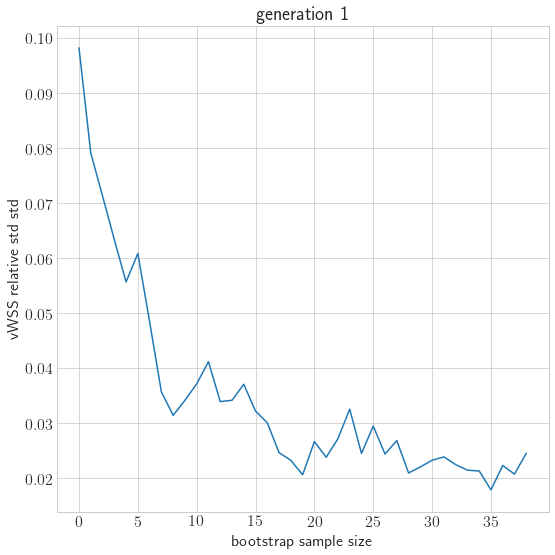

In [26]:
plt.figure(figsize=(8,8))
plt.title('generation ' + str(generation))
plt.plot(BOOT_INDS, MAT_STD)
plt.ylabel(label + ' std')
plt.xlabel('bootstrap sample size')
plt.tight_layout()
plt.show()
plt.close()

plt.figure(figsize=(8,8))
plt.title('generation ' + str(generation))
plt.errorbar(BOOT_INDS,y=mu_std, yerr=std_std, fmt='o')
plt.ylabel(label + ' std std')
plt.xlabel('bootstrap sample size')
plt.tight_layout()
plt.show()
plt.close()

plt.figure(figsize=(8,8))
plt.title('generation ' + str(generation))
plt.plot(BOOT_INDS,rel_std)
plt.ylabel(label +' relative std std')
plt.xlabel('bootstrap sample size')
plt.tight_layout()
plt.show()
plt.close()

In [25]:
print(MAT_STD[-1])

[0.77942507 0.81240275 0.79408437 0.81717306 0.78086544 0.78796396
 0.76423228 0.75704716 0.76640609 0.78737306 0.7950772  0.78920367
 0.80010038 0.7956435  0.79676397 0.77798823 0.77181458 0.80084845
 0.7844491  0.76468707 0.76647906 0.79253233 0.80351739 0.8005629
 0.73393293 0.76233147 0.80603146 0.79506764 0.82440531 0.79468234]
